In [1]:
import tensorflow as tf

In [2]:
resnet_notop=tf.keras.applications.resnet50.ResNet50(include_top=False,pooling='avg')
# resnet_top=tf.keras.applications.ResNet50(include_top=True)

In [3]:
resnet_notop.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [4]:
for layers in resnet_notop.layers:
    layers.trainable=False

In [5]:
output_layer=tf.keras.layers.Dense(2,activation='softmax')(resnet_notop.output)

In [6]:
mymodel=tf.keras.Model(inputs=resnet_notop.input,outputs=output_layer)

In [7]:
mymodel.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [8]:
for layers in mymodel.layers:
    print(layers.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [9]:

# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
mymodel.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
%%time
training='cats_n_dogs/train'
validation='cats_n_dogs/validation'
epochs=2

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.25 µs


In [11]:
%%time
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input

    )

datagen_flow_object = datagen.flow_from_directory(
    training,
    target_size=(224, 224),
    batch_size=32
)

r = mymodel.fit_generator(
    datagen_flow_object, epochs=epochs,
    validation_data=datagen.flow_from_directory(validation,
                                                target_size=(224, 224),
                                                batch_size=32)
)

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


/Users/abhijitshingote/.virtualenvs/nlp/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
 7/63 [==>...........................] - ETA: 3:12 - loss: 0.7891 - accuracy: 0.7009

/Users/abhijitshingote/.virtualenvs/nlp/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:793: UserWarning: Truncated File Read
  warnings.warn(str(msg))


63/63 [==============================] - 257s 4s/step - loss: 0.1885 - accuracy: 0.9320 - val_loss: 0.0367 - val_accuracy: 0.9950
Epoch 2/2
63/63 [==============================] - 230s 4s/step - loss: 0.0435 - accuracy: 0.9850 - val_loss: 0.0234 - val_accuracy: 0.9950
CPU times: user 19min 25s, sys: 4min 4s, total: 23min 29s
Wall time: 8min 7s


In [13]:
mymodel.evaluate(datagen.flow_from_directory('cats_n_dogs/validation/',target_size=(224,224),batch_size=32))

Found 400 images belonging to 2 classes.
13/13 [==============================] - 39s 3s/step - loss: 0.0234 - accuracy: 0.9950


[0.023409543558955193, 0.9950000047683716]

In [31]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img_path = 'cats_n_dogs/validation/dog/10068.jpg'

def check_pred(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.resnet50.preprocess_input(x)
    preds = mymodel.predict(x)

    class_dict={value:key for key,value in datagen_flow_object.class_indices.items()}
    print('Predicted:', class_dict[np.argmax(preds)])

(1, 224, 224, 3)
(1, 224, 224, 3)
Predicted: dog


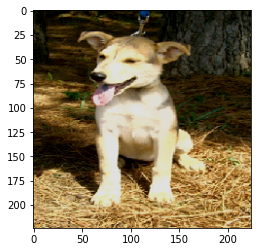

In [30]:
check_pred('cats_n_dogs/validation/dog/10068.jpg')

Predicted: cat


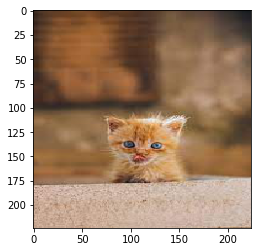

In [37]:
check_pred('testimages/Unknown')

Predicted: cat


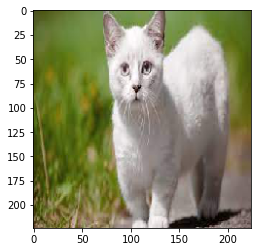

In [40]:
check_pred('testimages/Unknown-2')

Predicted: cat


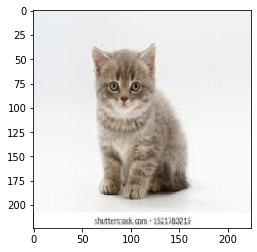

In [41]:
check_pred('testimages/Unknown-3')

Predicted: cat


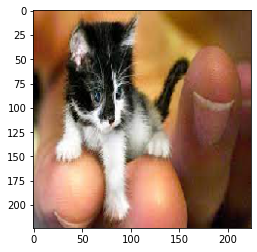

In [42]:
check_pred('testimages/Unknown-4')

Predicted: cat


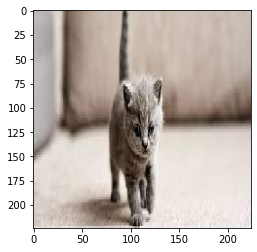

In [43]:
check_pred('testimages/Unknown-5')

Predicted: dog


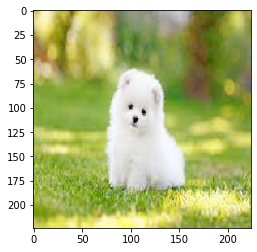

In [44]:
check_pred('testimages/Unknown-6')

Predicted: dog


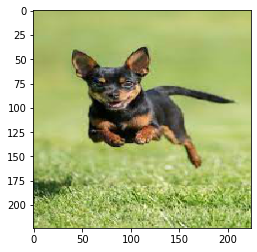

In [45]:
check_pred('testimages/Unknown-7')

Predicted: dog


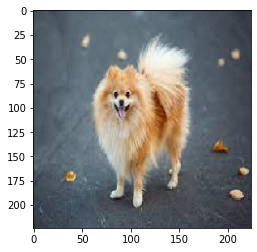

In [46]:
check_pred('testimages/Unknown-8')

Predicted: dog


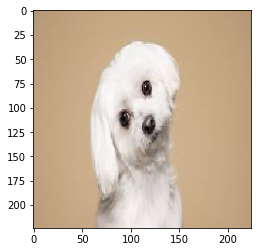

In [47]:
check_pred('testimages/Unknown-9')